<a href="https://colab.research.google.com/github/bhanuteja2001/AI_Curriculum/blob/master/IndependancedayJanatahack.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [1]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.model_selection import train_test_split

In [43]:
from sklearn.linear_model import SGDClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC

from sklearn.multiclass import OneVsRestClassifier

In [6]:
from google.colab import files
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [7]:
train = pd.read_csv('train.csv')
print(train.shape)
train.head()

(20972, 9)


,ID,TITLE,ABSTRACT,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,Reconstructing Subject-Specific Effect Maps,Predictive models allow subject-specific inf...,1,0,0,0,0,0
1,2,Rotation Invariance Neural Network,Rotation invariance and translation invarian...,1,0,0,0,0,0
2,3,Spherical polyharmonics and Poisson kernels fo...,We introduce and develop the notion of spher...,0,0,1,0,0,0
3,4,A finite element approximation for the stochas...,The stochastic Landau--Lifshitz--Gilbert (LL...,0,0,1,0,0,0
4,5,Comparative study of Discrete Wavelet Transfor...,Fourier-transform infra-red (FTIR) spectra o...,1,0,0,1,0,0


In [88]:
test = pd.read_csv('test.csv')
print(test.shape)
test.head()

(8989, 3)


,ID,TITLE,ABSTRACT
0,20973,Closed-form Marginal Likelihood in Gamma-Poiss...,We present novel understandings of the Gamma...
1,20974,Laboratory mid-IR spectra of equilibrated and ...,Meteorites contain minerals from Solar Syste...
2,20975,Case For Static AMSDU Aggregation in WLANs,Frame aggregation is a mechanism by which mu...
3,20976,The $Gaia$-ESO Survey: the inner disk intermed...,Milky Way open clusters are very diverse in ...
4,20977,Witness-Functions versus Interpretation-Functi...,Proving that a cryptographic protocol is cor...


In [9]:
categories = train.columns[3:]
cat_count = {}
for cat in categories:
  cat_count[cat] = train[cat].value_counts()[1]

In [10]:
cat_count

{'Computer Science': 8594,
 'Mathematics': 5618,
 'Physics': 6013,
 'Quantitative Biology': 587,
 'Quantitative Finance': 249,
 'Statistics': 5206}

In [11]:
keys = cat_count.keys()
values = cat_count.values()

[]

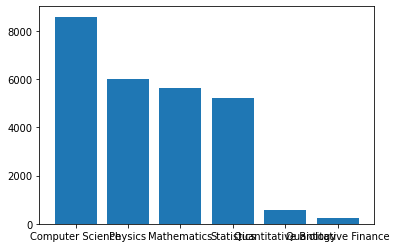

In [12]:
plt.bar(keys,values)
plt.plot()

In [13]:
import re
import nltk
import string
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

In [14]:

def clean_text(df,catu):
    all_reviews = list()
    lines = df[catu].values.tolist()
    for text in lines:
        text = text.lower()
        
        pattern = re.compile('http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+')
        text = pattern.sub('', text)
        
        emoji = re.compile("["
                           u"\U0001F600-\U0001FFFF"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
        text = emoji.sub(r'', text)
        
        text = re.sub(r"i'm", "i am", text)
        text = re.sub(r"he's", "he is", text)
        text = re.sub(r"she's", "she is", text)
        text = re.sub(r"that's", "that is", text)        
        text = re.sub(r"what's", "what is", text)
        text = re.sub(r"where's", "where is", text) 
        text = re.sub(r"\'ll", " will", text)  
        text = re.sub(r"\'ve", " have", text)  
        text = re.sub(r"\'re", " are", text)
        text = re.sub(r"\'d", " would", text)
        text = re.sub(r"\'ve", " have", text)
        text = re.sub(r"won't", "will not", text)
        text = re.sub(r"don't", "do not", text)
        text = re.sub(r"did't", "did not", text)
        text = re.sub(r"can't", "can not", text)
        text = re.sub(r"it's", "it is", text)
        text = re.sub(r"couldn't", "could not", text)
        text = re.sub(r"have't", "have not", text)
        
        text = re.sub(r"[,.\"!@#$%^&*(){}?/;`~:<>+=-]", "", text)
        tokens = word_tokenize(text)
        table = str.maketrans('', '', string.punctuation)
        stripped = [w.translate(table) for w in tokens]
        words = [word for word in stripped if word.isalpha()]
#         stop_words = set(stopwords.words("english"))
#         stop_words.discard("not")
#         words = [w for w in words if not w in stop_words]
        words = ' '.join(words)
        all_reviews.append(words)
    return all_reviews

In [19]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [20]:
Title = clean_text(train,'TITLE')
Abstract = clean_text(train,'ABSTRACT')

In [37]:
train = train.drop(columns=['TITLE', 'ABSTRACT'])
train.head()

,ID,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance,NEW
0,1,1,0,0,0,0,0,reconstructing subjectspecific effect maps pre...
1,2,1,0,0,0,0,0,rotation invariance neural network rotation in...
2,3,0,0,1,0,0,0,spherical polyharmonics and poisson kernels fo...
3,4,0,0,1,0,0,0,a finite element approximation for the stochas...
4,5,1,0,0,1,0,0,comparative study of discrete wavelet transfor...


In [38]:
tfidf = TfidfVectorizer(analyzer='word')
X = tfidf.fit_transform(train['NEW'])

In [39]:
len(tfidf.vocabulary_)

79766

In [41]:
y = train[categories]
y.head()

,Computer Science,Physics,Mathematics,Statistics,Quantitative Biology,Quantitative Finance
0,1,0,0,0,0,0
1,1,0,0,0,0,0
2,0,0,1,0,0,0
3,0,0,1,0,0,0
4,1,0,0,1,0,0


In [35]:
train['NEW'] = train['TITLE'].str.cat(train['ABSTRACT'],sep=" ")

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [44]:
sgd = SGDClassifier()
lr = LogisticRegression(solver='lbfgs')
svc = LinearSVC()

In [46]:
def j_score(y_true, y_pred):
  jaccard = np.minimum(y_true, y_pred).sum(axis=1)/np.maximum(y_true, y_pred).sum(axis=1)
  return jaccard.mean()*100

def print_score(y_pred, clf):
  print("Clf: ", clf.__class__.__name__)
  print("Jacard score: {}".format(j_score(y_test, y_pred)))
  print('-------')

In [47]:
for classifier in [sgd, lr, svc]:
  clf = OneVsRestClassifier(classifier)
  clf.fit(X_train,y_train)
  y_pred = clf.predict(X_test)
  print_score(y_pred, classifier)
  

Clf:  SGDClassifier
Jacard score: 76.45212554628527
-------
Clf:  LogisticRegression
Jacard score: 73.9372268573699
-------
Clf:  LinearSVC
Jacard score: 75.78069129916568
-------


In [53]:
x = train['NEW'].iloc[1]
x = [x]
x

['rotation invariance neural network rotation invariance and translation invariance have great values in image recognition tasks in this paper we bring a new architecture in convolutional neural network cnn named cyclic convolutional layer to achieve rotation invariance in symbol recognition we can also get the position and orientation of the symbol by the network to achieve detection purpose for multiple nonoverlap target last but not least this architecture can achieve oneshot learning in some cases using those invariance']

In [54]:
xt = tfidf.transform(x)

In [55]:
clf.predict(xt)

array([[1, 0, 0, 0, 0, 0]])

In [79]:
y = np.array(y)
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0]])

In [80]:
categories

Index(['Computer Science', 'Physics', 'Mathematics', 'Statistics',
       'Quantitative Biology', 'Quantitative Finance'],
      dtype='object')

In [81]:
y

array([[1, 0, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 0, 0, 0],
       ...,
       [1, 0, 0, 0, 0, 0],
       [0, 0, 1, 1, 0, 0],
       [0, 0, 1, 1, 0, 0]])

TEST DATA

In [96]:
test.head()

,ID,TITLE,ABSTRACT,NEW
0,20973,closedform marginal likelihood in gammapoisson...,we present novel understandings of the gammapo...,closedform marginal likelihood in gammapoisson...
1,20974,laboratory midir spectra of equilibrated and i...,meteorites contain minerals from solar system ...,laboratory midir spectra of equilibrated and i...
2,20975,case for static amsdu aggregation in wlans,frame aggregation is a mechanism by which mult...,case for static amsdu aggregation in wlans fra...
3,20976,the gaiaeso survey the inner disk intermediate...,milky way open clusters are very diverse in te...,the gaiaeso survey the inner disk intermediate...
4,20977,witnessfunctions versus interpretationfunction...,proving that a cryptographic protocol is corre...,witnessfunctions versus interpretationfunction...


In [90]:
categories = test.columns[3:]
cat_count = {}
for cat in categories:
  cat_count[cat] = test[cat].value_counts()[1]

In [91]:
Title = clean_text(test,'TITLE')
Abstract = clean_text(test,'ABSTRACT')

In [93]:
test['TITLE'] = Title
test['ABSTRACT'] = Abstract

In [95]:
test['NEW'] = test['TITLE'].str.cat(test['ABSTRACT'],sep=" ")

In [97]:
test = test.drop(columns=['TITLE', 'ABSTRACT'])
test.head()

,ID,NEW
0,20973,closedform marginal likelihood in gammapoisson...
1,20974,laboratory midir spectra of equilibrated and i...
2,20975,case for static amsdu aggregation in wlans fra...
3,20976,the gaiaeso survey the inner disk intermediate...
4,20977,witnessfunctions versus interpretationfunction...


<20972x79766 sparse matrix of type '<class 'numpy.float64'>'
	with 1902188 stored elements in Compressed Sparse Row format>

In [118]:
xt = tfidf.transform(VAL)

AttributeError: ignored

In [117]:
VAL = []
for val in test['NEW']:
  VAL.append([val])
VAL = np.array(VAL)